# Actividad Semanal 9: Reto equipo 29
- Ángel De Jesús Hernández Pascual Matricula:A01794415
- Jose Alberto Almada Gerardo Matricula:A01794415
- Profesor: María de la Paz Rico Fernández
- Fecha: 11/16/2022


Objetivo: Entender métodos de Regresiones y K means.

## Limpieza, análisis, visualización y agrupamiento.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

Limpieza de base de datos.
- Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
- Identificando tendencias centrales promedio, media y mediana de los datos. 
- Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
- Identificar correlaciones.
- Preparar los datos 
- Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
- Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.
 

# 1.- Limpieza y normalizacion de datos

In [215]:
# Importar librerias
import requests
import zipfile
import io
import pandas as pd
import numpy as np

# importamos librerias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

In [216]:
# Preparamos la base de datos
path = 'https://github.com/PosgradoMNA/actividades-del-projecto-equipo-29/blob/main/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip?raw=true'
path_request = requests.get(path, stream=True)
path_zip = zipfile.ZipFile(io.BytesIO(path_request.content))
path_zip.extractall("./")
directory = './Datos_de_calidad_del_agua_2020'
file = '/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(directory + file, encoding = "cp1252")

In [217]:
# data frame shape
print({df.shape})

{(1068, 57)}


In [218]:
# Mostremos la base de datos
display(df.head())
display(df.shape)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


(1068, 57)

In [219]:
# Revisamos si tenemos valores NAN
df.isnull().values.any()

True

In [220]:
#Copiar df a datos_aguas_subterraneas 
datos_aguas_subterraneas_2020= df.copy()
#Verificamos qué columna tiene datos faltantes y cuántos por columna
"How many missing data are per column:",datos_aguas_subterraneas_2020.isna().sum()

('How many missing data are per column:', CLAVE                      0
 SITIO                      0
 ORGANISMO_DE_CUENCA        0
 ESTADO                     0
 MUNICIPIO                  0
 ACUIFERO                   0
 SUBTIPO                    0
 LONGITUD                   0
 LATITUD                    0
 PERIODO                    0
 ALC_mg/L                   4
 CALIDAD_ALC                4
 CONDUCT_mS/cm              6
 CALIDAD_CONDUC             6
 SDT_mg/L                1068
 SDT_M_mg/L                 2
 CALIDAD_SDT_ra             2
 CALIDAD_SDT_salin          2
 FLUORUROS_mg/L             0
 CALIDAD_FLUO               0
 DUR_mg/L                   1
 CALIDAD_DUR                1
 COLI_FEC_NMP/100_mL        0
 CALIDAD_COLI_FEC           0
 N_NO3_mg/L                 1
 CALIDAD_N_NO3              1
 AS_TOT_mg/L                0
 CALIDAD_AS                 0
 CD_TOT_mg/L                0
 CALIDAD_CD                 0
 CR_TOT_mg/L                0
 CALIDAD_CR                 0

In [221]:
#Copiar df a datos_aguas_subterraneas 
datos_aguas_subterraneas_2020= df.copy() 
# Decidimos eliminar SDT_mg/l, ya que todos sus valores son NAN
# Decidimos eliminar PERIODO, ya que todos sus valores son 2020
datos_aguas_subterraneas_2020.drop('SDT_mg/L', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('PERIODO', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('SDT_M_mg/L', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CALIDAD_SDT_ra', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CALIDAD_SDT_salin', axis = 1, inplace = True)
# Decidimos eliminar CUMPLE_CON..., ya que todos sus valores son 'Si'
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_ALC', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_COND', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_SDT_ra', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_SDT_salin', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_FLUO', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_DUR', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_CF', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_NO3', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_AS', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_CD', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_CR', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_HG', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_PB', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_MN', axis = 1, inplace = True)
datos_aguas_subterraneas_2020.drop('CUMPLE_CON_FE', axis = 1, inplace = True)

In [222]:
#Lossiguientes valores necesitan ser normalizados ya que tienen valores como <0.025 
datos_aguas_subterraneas_2020['FLUORUROS_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL'].value_counts(),
datos_aguas_subterraneas_2020['AS_TOT_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['CD_TOT_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['CR_TOT_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['HG_TOT_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['PB_TOT_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['MN_TOT_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['N_NO3_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['DUR_mg/L'].value_counts(),
datos_aguas_subterraneas_2020['FE_TOT_mg/L'].value_counts(),

(<0.025    401
 0.0288      4
 0.0492      4
 0.0471      3
 0.0564      3
          ... 
 0.1118      1
 0.0565      1
 0.3947      1
 0.0858      1
 0.1786      1
 Name: FE_TOT_mg/L, Length: 615, dtype: int64,)

In [223]:
# revisemos la informacion del data frame
datos_aguas_subterraneas_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CLAVE                1068 non-null   object 
 1   SITIO                1068 non-null   object 
 2   ORGANISMO_DE_CUENCA  1068 non-null   object 
 3   ESTADO               1068 non-null   object 
 4   MUNICIPIO            1068 non-null   object 
 5   ACUIFERO             1068 non-null   object 
 6   SUBTIPO              1068 non-null   object 
 7   LONGITUD             1068 non-null   float64
 8   LATITUD              1068 non-null   float64
 9   ALC_mg/L             1064 non-null   float64
 10  CALIDAD_ALC          1064 non-null   object 
 11  CONDUCT_mS/cm        1062 non-null   float64
 12  CALIDAD_CONDUC       1062 non-null   object 
 13  FLUORUROS_mg/L       1068 non-null   object 
 14  CALIDAD_FLUO         1068 non-null   object 
 15  DUR_mg/L             1067 non-null   o

In [224]:
#Normalizacion de datos y conversion a float.

#FLUORUROS_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['FLUORUROS_mg/L'] == '<0.2', 'FLUORUROS_mg/L'] = 0.19
datos_aguas_subterraneas_2020['FLUORUROS_mg/L'] = datos_aguas_subterraneas_2020['FLUORUROS_mg/L'].astype(float)

#COLI_FEC_NMP/100_mL
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL'] == '<1.1', 'COLI_FEC_NMP/100_mL'] = 1.09
datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL'] = datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL'].astype(float)

#AS_TOT_mg/L
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['AS_TOT_mg/L'] == '<0.01', 'AS_TOT_mg/L'] = 0.009
datos_aguas_subterraneas_2020['AS_TOT_mg/L'] = datos_aguas_subterraneas_2020['AS_TOT_mg/L'].astype(float)

#CD_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['CR_TOT_mg/L'] == '<0.005', 'CR_TOT_mg/L'] = 0.0049
datos_aguas_subterraneas_2020['CR_TOT_mg/L'] = datos_aguas_subterraneas_2020['CR_TOT_mg/L'].astype(float)

#HG_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['HG_TOT_mg/L'] == '<0.0005', 'HG_TOT_mg/L'] = 0.00049
datos_aguas_subterraneas_2020['HG_TOT_mg/L'] = datos_aguas_subterraneas_2020['HG_TOT_mg/L'].astype(float)

#PB_TOT_mg/L
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['PB_TOT_mg/L'] == '<0.005', 'PB_TOT_mg/L'] = 0.0049
datos_aguas_subterraneas_2020['PB_TOT_mg/L'] = datos_aguas_subterraneas_2020['PB_TOT_mg/L'].astype(float)

#MN_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['MN_TOT_mg/L'] == '<0.0015', 'MN_TOT_mg/L'] = 0.00149
datos_aguas_subterraneas_2020['MN_TOT_mg/L'] = datos_aguas_subterraneas_2020['MN_TOT_mg/L'].astype(float)

#N_NO3_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['N_NO3_mg/L'] == '<0.02', 'N_NO3_mg/L'] = 0.019
datos_aguas_subterraneas_2020['N_NO3_mg/L'] = datos_aguas_subterraneas_2020['N_NO3_mg/L'].astype(float)

#DUR_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['DUR_mg/L'] == '<20', 'DUR_mg/L'] = 19.99
datos_aguas_subterraneas_2020['DUR_mg/L'] = datos_aguas_subterraneas_2020['DUR_mg/L'].astype(float)

#FE_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['FE_TOT_mg/L'] == '<0.025', 'FE_TOT_mg/L'] = .0249
datos_aguas_subterraneas_2020['FE_TOT_mg/L'] = datos_aguas_subterraneas_2020['FE_TOT_mg/L'].astype(float)

#CD_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['CD_TOT_mg/L'] == '<0.003', 'CD_TOT_mg/L'] = .002
datos_aguas_subterraneas_2020['CD_TOT_mg/L'] = datos_aguas_subterraneas_2020['CD_TOT_mg/L'].astype(float)

#MN_TOT_mg/L
datos_aguas_subterraneas_2020.loc[datos_aguas_subterraneas_2020['CD_TOT_mg/L'] == '<0.0015', 'CD_TOT_mg/L'] = .0014
datos_aguas_subterraneas_2020['CD_TOT_mg/L'] = datos_aguas_subterraneas_2020['CD_TOT_mg/L'].astype(float)

In [225]:
#Remplazamos los siguientes NAN values por la media
datos_aguas_subterraneas_2020['ALC_mg/L'].fillna( value=datos_aguas_subterraneas_2020['ALC_mg/L'].mean(),inplace= True)
datos_aguas_subterraneas_2020['CONDUCT_mS/cm'].fillna( value=datos_aguas_subterraneas_2020['CONDUCT_mS/cm'].mean(),inplace= True)
#Remplazamos los siguientes NAN values por no definido
datos_aguas_subterraneas_2020['N_NO3_mg/L'].fillna( value=datos_aguas_subterraneas_2020['N_NO3_mg/L'].fillna('4.31'),inplace= True)
datos_aguas_subterraneas_2020['DUR_mg/L'].fillna( value=datos_aguas_subterraneas_2020['DUR_mg/L'].fillna('347.93'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_ALC'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_ALC'].fillna('No definido'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_CONDUC'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_CONDUC'].fillna('No definido'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_DUR'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_DUR'].fillna('No definido'),inplace= True)
datos_aguas_subterraneas_2020['CALIDAD_N_NO3'].fillna( value=datos_aguas_subterraneas_2020['CALIDAD_N_NO3'].fillna('No definido'),inplace= True)

#Remplazamos los siguientes NAN values en 'contaminantes' por sin contaminar
datos_aguas_subterraneas_2020['CONTAMINANTES'].fillna( value=datos_aguas_subterraneas_2020['CONTAMINANTES'].fillna('SinContaminar'),inplace= True)

In [226]:
#Check what column have data missings and how many per column
datos_aguas_subterraneas_kmean= datos_aguas_subterraneas_2020.copy()
"How many missing data are per column:",datos_aguas_subterraneas_2020.isna().sum()

('How many missing data are per column:', CLAVE                  0
 SITIO                  0
 ORGANISMO_DE_CUENCA    0
 ESTADO                 0
 MUNICIPIO              0
 ACUIFERO               0
 SUBTIPO                0
 LONGITUD               0
 LATITUD                0
 ALC_mg/L               0
 CALIDAD_ALC            0
 CONDUCT_mS/cm          0
 CALIDAD_CONDUC         0
 FLUORUROS_mg/L         0
 CALIDAD_FLUO           0
 DUR_mg/L               0
 CALIDAD_DUR            0
 COLI_FEC_NMP/100_mL    0
 CALIDAD_COLI_FEC       0
 N_NO3_mg/L             0
 CALIDAD_N_NO3          0
 AS_TOT_mg/L            0
 CALIDAD_AS             0
 CD_TOT_mg/L            0
 CALIDAD_CD             0
 CR_TOT_mg/L            0
 CALIDAD_CR             0
 HG_TOT_mg/L            0
 CALIDAD_HG             0
 PB_TOT_mg/L            0
 CALIDAD_PB             0
 MN_TOT_mg/L            0
 CALIDAD_MN             0
 FE_TOT_mg/L            0
 CALIDAD_FE             0
 SEMAFORO               0
 CONTAMINANTES         

#2.-Confirmamos datos de Muestreos Vs datos de calidad

Calidad Alc vs ALC_mg/L, despues de 400 ALC_mg/L las muestras dan valores de indeseables como FAAP.

Text(0, 0.5, 'CALIDAD_ALC')

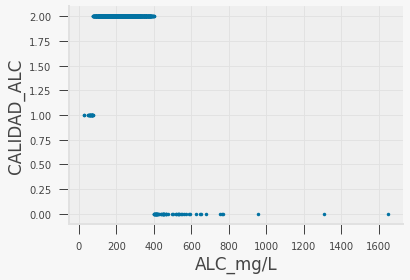

In [227]:
#1. Comparemos calidad Alc vs ALC_mg/L
# 2= Alta o media
# 1= Baja
# 0= Indeseable como FAAP
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_ALC'] == 'Alta', 'CALIDAD_ALC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_ALC'] == 'Media', 'CALIDAD_ALC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_ALC'] == 'No definido', 'CALIDAD_ALC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_ALC'] == 'Baja', 'CALIDAD_ALC'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_ALC'] == 'Indeseable como FAAP', 'CALIDAD_ALC'] =0
datos_aguas_subterraneas_2020['CALIDAD_ALC'] = datos_aguas_subterraneas_2020['CALIDAD_ALC'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_ALC']
X = datos_aguas_subterraneas_2020['ALC_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("ALC_mg/L")
plt.ylabel("CALIDAD_ALC")

Calidad Conduc vs CONDUCT_mS/cm, despues de 2500 CONDUCT_mS/cm las muestras dan valores de indeseables para riego.

Text(0, 0.5, 'CALIDAD_CONDUC')

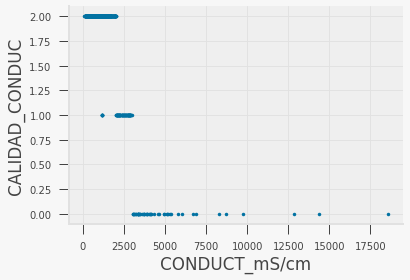

In [228]:
#2. Comparemos calidad Conduc vs CONDUCT_mS/cm
# 2= Buena para riego
# 1= Dudosa para riego
# 0= Indeseable para riego
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CONDUC'] == 'Excelente para riego', 'CALIDAD_CONDUC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CONDUC'] == 'Buena para riego', 'CALIDAD_CONDUC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CONDUC'] == 'Permisible para riego', 'CALIDAD_CONDUC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CONDUC'] == 'Dudosa para riego', 'CALIDAD_CONDUC'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CONDUC'] == 'No definido', 'CALIDAD_CONDUC'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CONDUC'] == 'Indeseable para riego', 'CALIDAD_CONDUC'] =0
datos_aguas_subterraneas_2020['CALIDAD_CONDUC'] = datos_aguas_subterraneas_2020['CALIDAD_CONDUC'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_CONDUC']
X = datos_aguas_subterraneas_2020['CONDUCT_mS/cm']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("CONDUCT_mS/cm")
plt.ylabel("CALIDAD_CONDUC")

Calidad FLUO vs FLUORUROS_mg/L, despues de 2 FLUORUROS_mg/L las muestras dan valores de indeseables debido al alto fluo.

Text(0, 0.5, 'CALIDAD_FLUO')

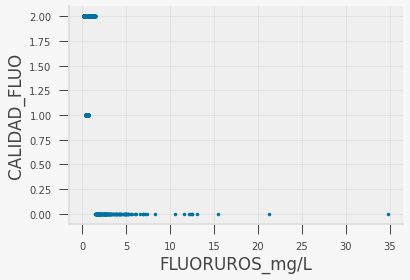

In [229]:
#3. Comparemos calidad FLUO vs FLUORUROS_mg/L
# 2= Baja concentracion, Potable optima
# 1= Media concentracion
# 0= Alta concentracion
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_FLUO'] == 'Baja', 'CALIDAD_FLUO'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_FLUO'] == 'Potable - Optima', 'CALIDAD_FLUO'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_FLUO'] == 'Media', 'CALIDAD_FLUO'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_FLUO'] == 'Alta', 'CALIDAD_FLUO'] =0
datos_aguas_subterraneas_2020['CALIDAD_FLUO'] = datos_aguas_subterraneas_2020['CALIDAD_FLUO'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_FLUO']
X = datos_aguas_subterraneas_2020['FLUORUROS_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("FLUORUROS_mg/L")
plt.ylabel("CALIDAD_FLUO")

CALIDAD_DUR vs DUR_mg/L,despues de 500 DUR_mg/L las muestras dan valores muy dura e indeseable usos industrial y domestico.

Text(0, 0.5, 'CALIDAD_DUR')

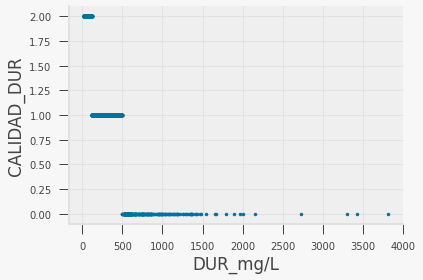

In [230]:
#4. Comparemos CALIDAD_DUR vs DUR_mg/L
# 2= Potable Suave-Moderadamente suave
# 1= Potable dura
# 0= Muy dura e indeseable usos industriale y domesticos
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_DUR'] == 'Potable - Suave', 'CALIDAD_DUR'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_DUR'] == 'Potable - Moderadamente suave', 'CALIDAD_DUR'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_DUR'] == 'Potable - Dura', 'CALIDAD_DUR'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_DUR'] == 'Muy dura e indeseable usos industrial y domestico', 'CALIDAD_DUR'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_DUR'] == 'No definido', 'CALIDAD_DUR'] =1
datos_aguas_subterraneas_2020['CALIDAD_DUR'] = datos_aguas_subterraneas_2020['CALIDAD_DUR'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_DUR']
X = datos_aguas_subterraneas_2020['DUR_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("DUR_mg/L")
plt.ylabel("CALIDAD_DUR")

CALIDAD_COLI_FEC vs COLI_FEC_NMP/100_mL,despues de 150 COLI_FEC_NMP/100_mL las muestras dan valores contaminados o muy contaminados.

Text(0, 0.5, 'CALIDAD_COLI_FEC')

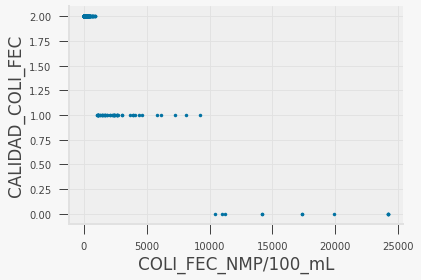

In [231]:
#5. Comparemos CALIDAD_COLI_FEC vs COLI_FEC_NMP/100_mL
# 2=Potable - Excelente, Buena calidad, Aceptable
# 1= Contaminada
# 0= Fuerte mente contaminada
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC'] == 'Potable - Excelente', 'CALIDAD_COLI_FEC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC'] == 'Buena calidad', 'CALIDAD_COLI_FEC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC'] == 'Aceptable', 'CALIDAD_COLI_FEC'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC'] == 'Contaminada', 'CALIDAD_COLI_FEC'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC'] == 'Fuertemente contaminada', 'CALIDAD_COLI_FEC'] =0
datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC'] = datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_COLI_FEC']
X = datos_aguas_subterraneas_2020['COLI_FEC_NMP/100_mL']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("COLI_FEC_NMP/100_mL")
plt.ylabel("CALIDAD_COLI_FEC")

CALIDAD_N_NO3 vs N_NO3_mg/L, despues de 10 N_NO3_mg/L las muestras dan valores muy dura e indeseable usos industrial y domestico.

Text(0, 0.5, 'CALIDAD_N_NO3')

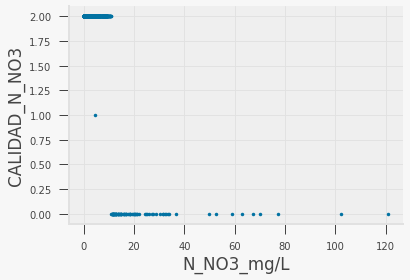

In [232]:
#6. Comparemos CALIDAD_N_NO3 vs N_NO3_mg/L
# 2=Potable - Excelente, Buena calidad
# 1= No definido
# 0= No apta como FAAP
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_N_NO3'] == 'Potable - Excelente', 'CALIDAD_N_NO3'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_N_NO3'] == 'Potable - Buena calidad', 'CALIDAD_N_NO3'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_N_NO3'] == 'No apta como FAAP', 'CALIDAD_N_NO3'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_N_NO3'] == 'No definido', 'CALIDAD_N_NO3'] =1
datos_aguas_subterraneas_2020['CALIDAD_N_NO3'] = datos_aguas_subterraneas_2020['CALIDAD_N_NO3'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_N_NO3']
X = datos_aguas_subterraneas_2020['N_NO3_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("N_NO3_mg/L")
plt.ylabel("CALIDAD_N_NO3")

CALIDAD_AS vs AS_TOT_mg/L, despues de 0.05 AS_TOT_mg/L las muestras dan valores No apta como FAAP

Text(0, 0.5, 'CALIDAD_AS')

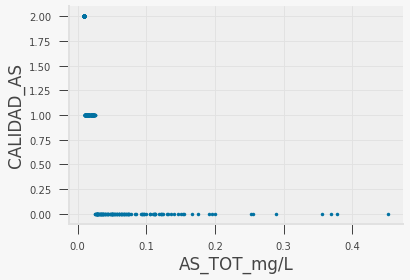

In [233]:
#7. Comparemos CALIDAD_AS vs AS_TOT_mg/L
# 2=Potable - Excelente
# 1= Apta como FAAP
# 0= No apta como FAAP
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_AS'] == 'Potable - Excelente', 'CALIDAD_AS'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_AS'] == 'Apta como FAAP', 'CALIDAD_AS'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_AS'] == 'No apta como FAAP', 'CALIDAD_AS'] =0
datos_aguas_subterraneas_2020['CALIDAD_AS'] = datos_aguas_subterraneas_2020['CALIDAD_AS'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_AS']
X = datos_aguas_subterraneas_2020['AS_TOT_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("AS_TOT_mg/L")
plt.ylabel("CALIDAD_AS")

CALIDAD_CD vs CD_TOT_mg/L, despues de 0.01 CD_TOT_mg/L las muestras dan valores No apta como FAAP

Text(0, 0.5, 'CALIDAD_CD')

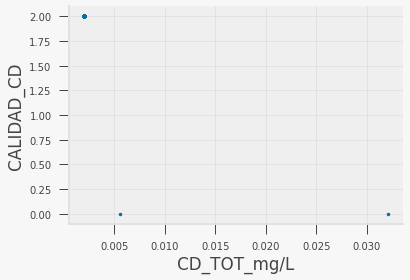

In [234]:
#8. Comparemos CALIDAD_CD vs CD_TOT_mg/L
# 2=Potable - Excelente
# 0= No apta como FAAP
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CD'] == 'Potable - Excelente', 'CALIDAD_CD'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CD'] == 'No apta como FAAP', 'CALIDAD_CD'] =0
datos_aguas_subterraneas_2020['CALIDAD_CD'] = datos_aguas_subterraneas_2020['CALIDAD_CD'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_CD']
X = datos_aguas_subterraneas_2020['CD_TOT_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("CD_TOT_mg/L")
plt.ylabel("CALIDAD_CD")

CALIDAD_CR vs Cr_TOT_mg/L, despues de 0.01 Cr_TOT_mg/L las muestras dan valores No apta como FAAP

Text(0, 0.5, 'CALIDAD_CR')

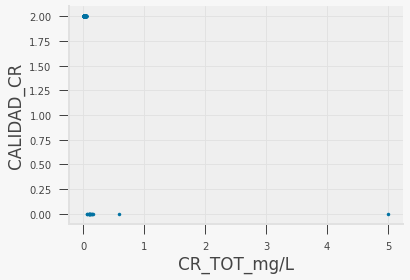

In [235]:
#8. Comparemos CALIDAD_CR vs Cr_TOT_mg/L
# 2=Potable - Excelente
# 0= No apta como FAAP
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CR'] == 'Potable - Excelente', 'CALIDAD_CR'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_CR'] == 'No apta como FAAP', 'CALIDAD_CR'] =0
datos_aguas_subterraneas_2020['CALIDAD_CR'] = datos_aguas_subterraneas_2020['CALIDAD_CR'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_CR']
X = datos_aguas_subterraneas_2020['CR_TOT_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("CR_TOT_mg/L")
plt.ylabel("CALIDAD_CR")

CALIDAD_HG vs HG_TOT_mg/L, despues de 0.004 HG_TOT_mg/L las muestras dan valores No apta como FAAP

Text(0, 0.5, 'CALIDAD_HG')

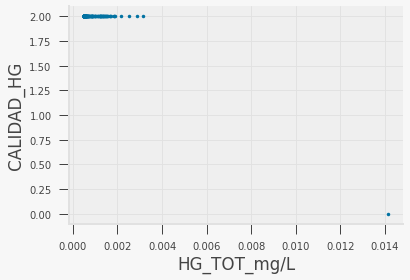

In [236]:
#9. Comparemos CALIDAD_hg vs hg_TOT_mg/L
# 2=Potable - Excelente
# 0= No apta como FAAP
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_HG'] == 'Potable - Excelente', 'CALIDAD_HG'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_HG'] == 'No apta como FAAP', 'CALIDAD_HG'] =0
datos_aguas_subterraneas_2020['CALIDAD_HG'] = datos_aguas_subterraneas_2020['CALIDAD_HG'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_HG']
X = datos_aguas_subterraneas_2020['HG_TOT_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("HG_TOT_mg/L")
plt.ylabel("CALIDAD_HG")

CALIDAD_PB vs PB_TOT_mg/L

Text(0, 0.5, 'CALIDAD_PB')

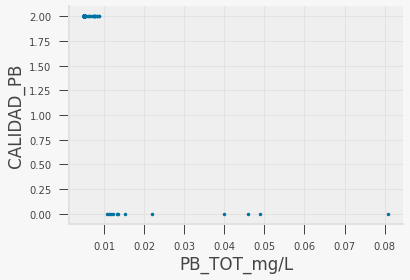

In [237]:
#10. Comparemos CALIDAD_PB vs PB_TOT_mg/L
# 2=Potable - Excelente
# 0= No apta como FAAP
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_PB'] == 'Potable - Excelente', 'CALIDAD_PB'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_PB'] == 'No apta como FAAP', 'CALIDAD_PB'] =0
datos_aguas_subterraneas_2020['CALIDAD_HG'] = datos_aguas_subterraneas_2020['CALIDAD_HG'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_PB']
X = datos_aguas_subterraneas_2020['PB_TOT_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("PB_TOT_mg/L")
plt.ylabel("CALIDAD_PB")

CALIDAD_MN vs MN_TOT_mg/L, despues de 0.01 MN_TOT_mg/L las muestras dan valores No apta como FAAP

Text(0, 0.5, 'CALIDAD_MN')

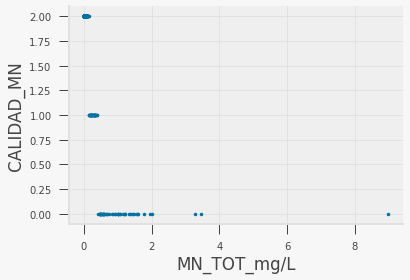

In [238]:
#11. Comparemos CALIDAD_MN vs MN_TOT_mg/L
# 2=Potable - Excelente
# 1=Sin efecto a la salud - puede causar coloracion
# 0= Puede afectar la salud
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_MN'] == 'Potable - Excelente', 'CALIDAD_MN'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_MN'] == 'Sin efectos en la salud - Puede dar color al agua', 'CALIDAD_MN'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_MN'] == 'Puede afectar la salud', 'CALIDAD_MN'] =0
datos_aguas_subterraneas_2020['CALIDAD_MN'] = datos_aguas_subterraneas_2020['CALIDAD_MN'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_MN']
X = datos_aguas_subterraneas_2020['MN_TOT_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("MN_TOT_mg/L")
plt.ylabel("CALIDAD_MN")

CALIDAD_FE vs FE_TOT_mg/L, despues de 0.005 FE_TOT_mg/L las muestras dan valores Sin efectos en la salud - Puede dar color al agua.

Text(0, 0.5, 'FE_TOT_mg/L')

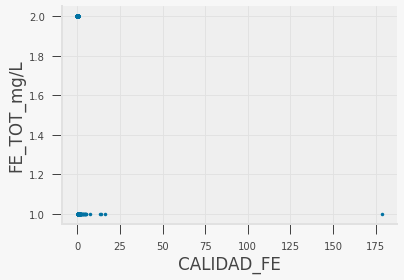

In [239]:
#12. Comparemos CALIDAD_FE vs FE_TOT_mg/L
# 2=Potable - Potable- Excelente
# 1= Sin efectos en la salud - Puede dar color al agua
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_FE'] == 'Potable - Excelente', 'CALIDAD_FE'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CALIDAD_FE'] == 'Sin efectos en la salud - Puede dar color al agua', 'CALIDAD_FE'] =1
datos_aguas_subterraneas_2020['CALIDAD_MN'] = datos_aguas_subterraneas_2020['CALIDAD_FE'].astype(float)
y= datos_aguas_subterraneas_2020['CALIDAD_FE']
X = datos_aguas_subterraneas_2020['FE_TOT_mg/L']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("CALIDAD_FE")
plt.ylabel("FE_TOT_mg/L")

CONTAMINANTES VS Semaforo, si las muestras tienen uno o mas contaminantes el semaforo es amarillo o rojo.


In [240]:
#13. CONTAMINANTES VS Semafore
#13. CONTAMINANTES
#3= SinContaminar
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'SinContaminar', 'CONTAMINANTES'] =3
#2= 1 contaminante
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'AS,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'N03,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FE,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'NO3,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'MN,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'PB,', 'CONTAMINANTES'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CR,', 'CONTAMINANTES'] =2
#1= 2 Contaminantes
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FE,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'AS,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,AS,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'MN,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,DT,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CF,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'AS,CR,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,FLUO,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'NI,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,DT,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,MN,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CR,MN,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,CF,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,PB,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'AS,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,MN,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,MN,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,CF,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CR,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'PB,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'MN,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,MN,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,PB,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,MN,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,MN,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,FE,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,NO3,', 'CONTAMINANTES'] =1
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,MN,', 'CONTAMINANTES'] =1
#0= 3 o mas Contaminante
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'PB,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,AS,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,DT,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,AS,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,FLUO,AS,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,PB,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,CD,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,PB,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,DT,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,AS,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,FLUO,AS,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CR,NI,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,SDT_ra,SDT_salin,DT,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'SDT_ra,SDT_salin,DT,CR,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,FLUO,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,CF,AS,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,CR,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,CR,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,FLUO,DT,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,AS,MN,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,FLUO,AS,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,HG,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,FE,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,AS,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,SDT_ra,SDT_salin,DT,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,DT,MN,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,AS,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,CF,AS,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,PB,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,AS,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,AS,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,CF,AS,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,CF,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,DT,MN', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,DT,AS,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,DT,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CF,MN,FE,' , 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'SDT_ra,SDT_salin,DT,MN,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ONDUC,SDT_ra,SDT_salin,DT,CF,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,CF,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'SDT_ra,SDT_salin,DT,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'AS,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,FLUO,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'SDT_ra,SDT_salin,DT,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,SDT_ra,SDT_salin,DT,FE,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,DT,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,CF,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,AS,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,AS,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,CR,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,SDT_ra,SDT_salin,FLUO,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,FLUO,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'SDT_ra,SDT_salin,DT,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,CD,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,AS,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,DT,AS,MN,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,FLUO,DT,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CR,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,FLUO,DT,CF,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,FE,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,AS,MN,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'DT,CF,PB,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,SDT_ra,SDT_salin,DT,FE,NO3,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'CONDUC,DT,CF,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'SDT_ra,SDT_salin,DT,MN,FE,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'FLUO,CF,AS,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,CONDUC,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['CONTAMINANTES'] == 'ALC,DT,MN,', 'CONTAMINANTES'] =0
datos_aguas_subterraneas_2020['CONTAMINANTES'] = datos_aguas_subterraneas_2020['CONTAMINANTES'].astype(float)

Text(0, 0.5, 'SEMAFORO')

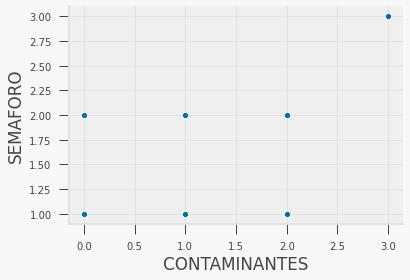

In [241]:
#13. CONTAMINANTES VS Semaforo
#13. SEMAFORO
# 2= Verde
# 1= Amarillo
# 0= Rojo
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['SEMAFORO'] == 'Verde', 'SEMAFORO'] =3
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['SEMAFORO'] == 'Amarillo', 'SEMAFORO'] =2
datos_aguas_subterraneas_2020.loc[ datos_aguas_subterraneas_2020['SEMAFORO'] == 'Rojo', 'SEMAFORO'] =1
datos_aguas_subterraneas_2020['SEMAFORO'] = datos_aguas_subterraneas_2020['SEMAFORO'].astype(float)
y= datos_aguas_subterraneas_2020['SEMAFORO']
X = datos_aguas_subterraneas_2020['CONTAMINANTES']
len(X)
y.describe
plt.plot(X,y,'b.')
plt.xlabel("CONTAMINANTES")
plt.ylabel("SEMAFORO")

Los Datos estan limpios y Normalizados, procedamos a revisar los valores por medio de las graficas.

# 3.- Plots

In [242]:
# importamos librerias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore



In [243]:
# declaramos la variable Boxplot_Subterranea
plot_Subterranea=datos_aguas_subterraneas_2020.select_dtypes(include=[np.number]).columns
boxplot_Subterranea=datos_aguas_subterraneas_2020.select_dtypes(include=[np.number]).columns
plot_Subterranea_Optimized = datos_aguas_subterraneas_2020[plot_Subterranea].apply(zscore)
boxplot_Subterranea_Optimized_uno= datos_aguas_subterraneas_2020[boxplot_Subterranea].apply(zscore)
boxplot_Subterranea_Optimized_dos= datos_aguas_subterraneas_2020[boxplot_Subterranea].apply(zscore)
boxplot_Subterranea_Optimized_uno.drop(['LONGITUD','LATITUD','CD_TOT_mg/L','CALIDAD_CD','CR_TOT_mg/L','CALIDAD_CR','HG_TOT_mg/L','CALIDAD_HG','MN_TOT_mg/L','CALIDAD_MN','SEMAFORO','CONTAMINANTES'], axis=1, inplace=True)
boxplot_Subterranea_Optimized_dos.drop(['LONGITUD','LATITUD','ALC_mg/L','CALIDAD_ALC', 'CONDUCT_mS/cm','CALIDAD_CONDUC', 'FLUORUROS_mg/L','CALIDAD_FLUO','COLI_FEC_NMP/100_mL','CALIDAD_COLI_FEC','AS_TOT_mg/L', 'CALIDAD_AS'], axis=1, inplace=True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc798cb5fd0>,
      dtype=object)

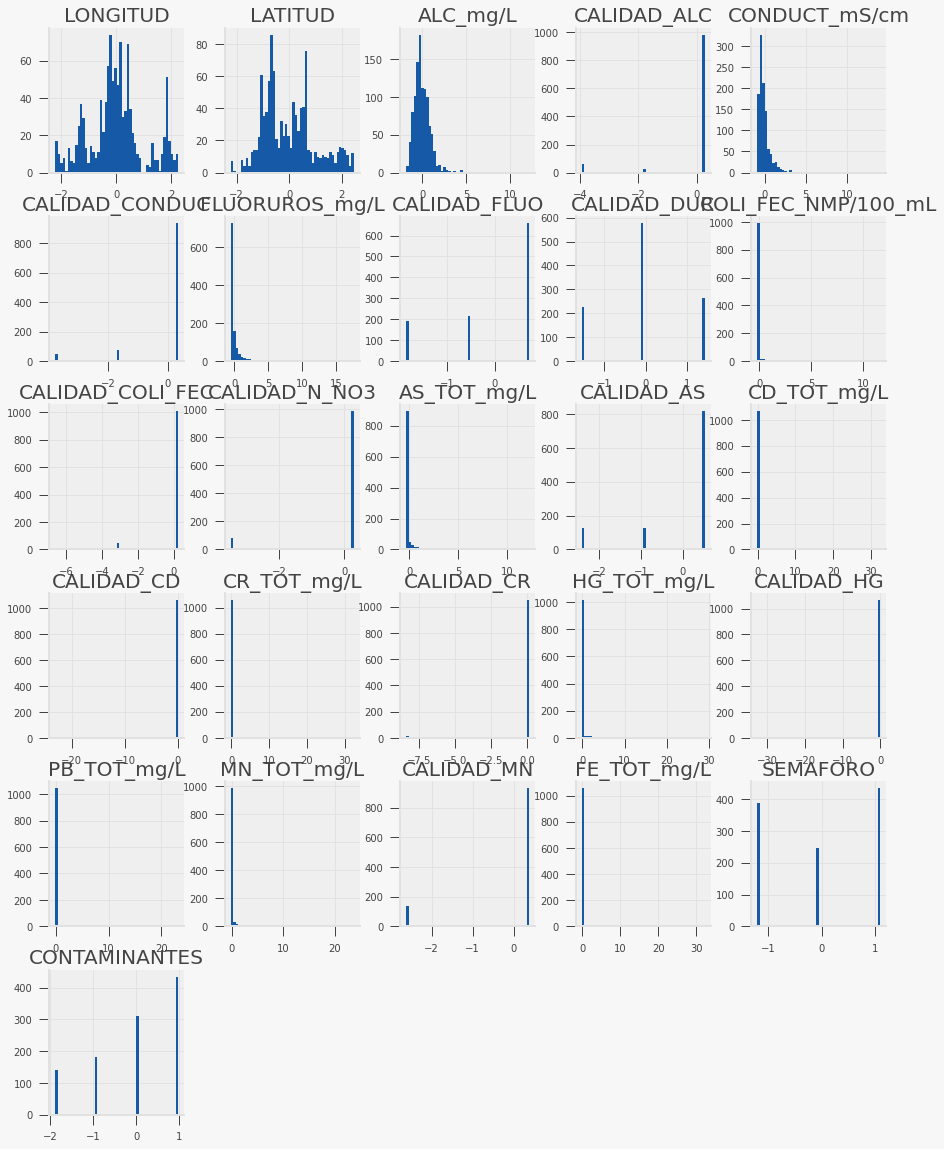

In [244]:
#Checamos el hist
plot_Subterranea_Optimized.hist(bins = 50, figsize=(15,20))

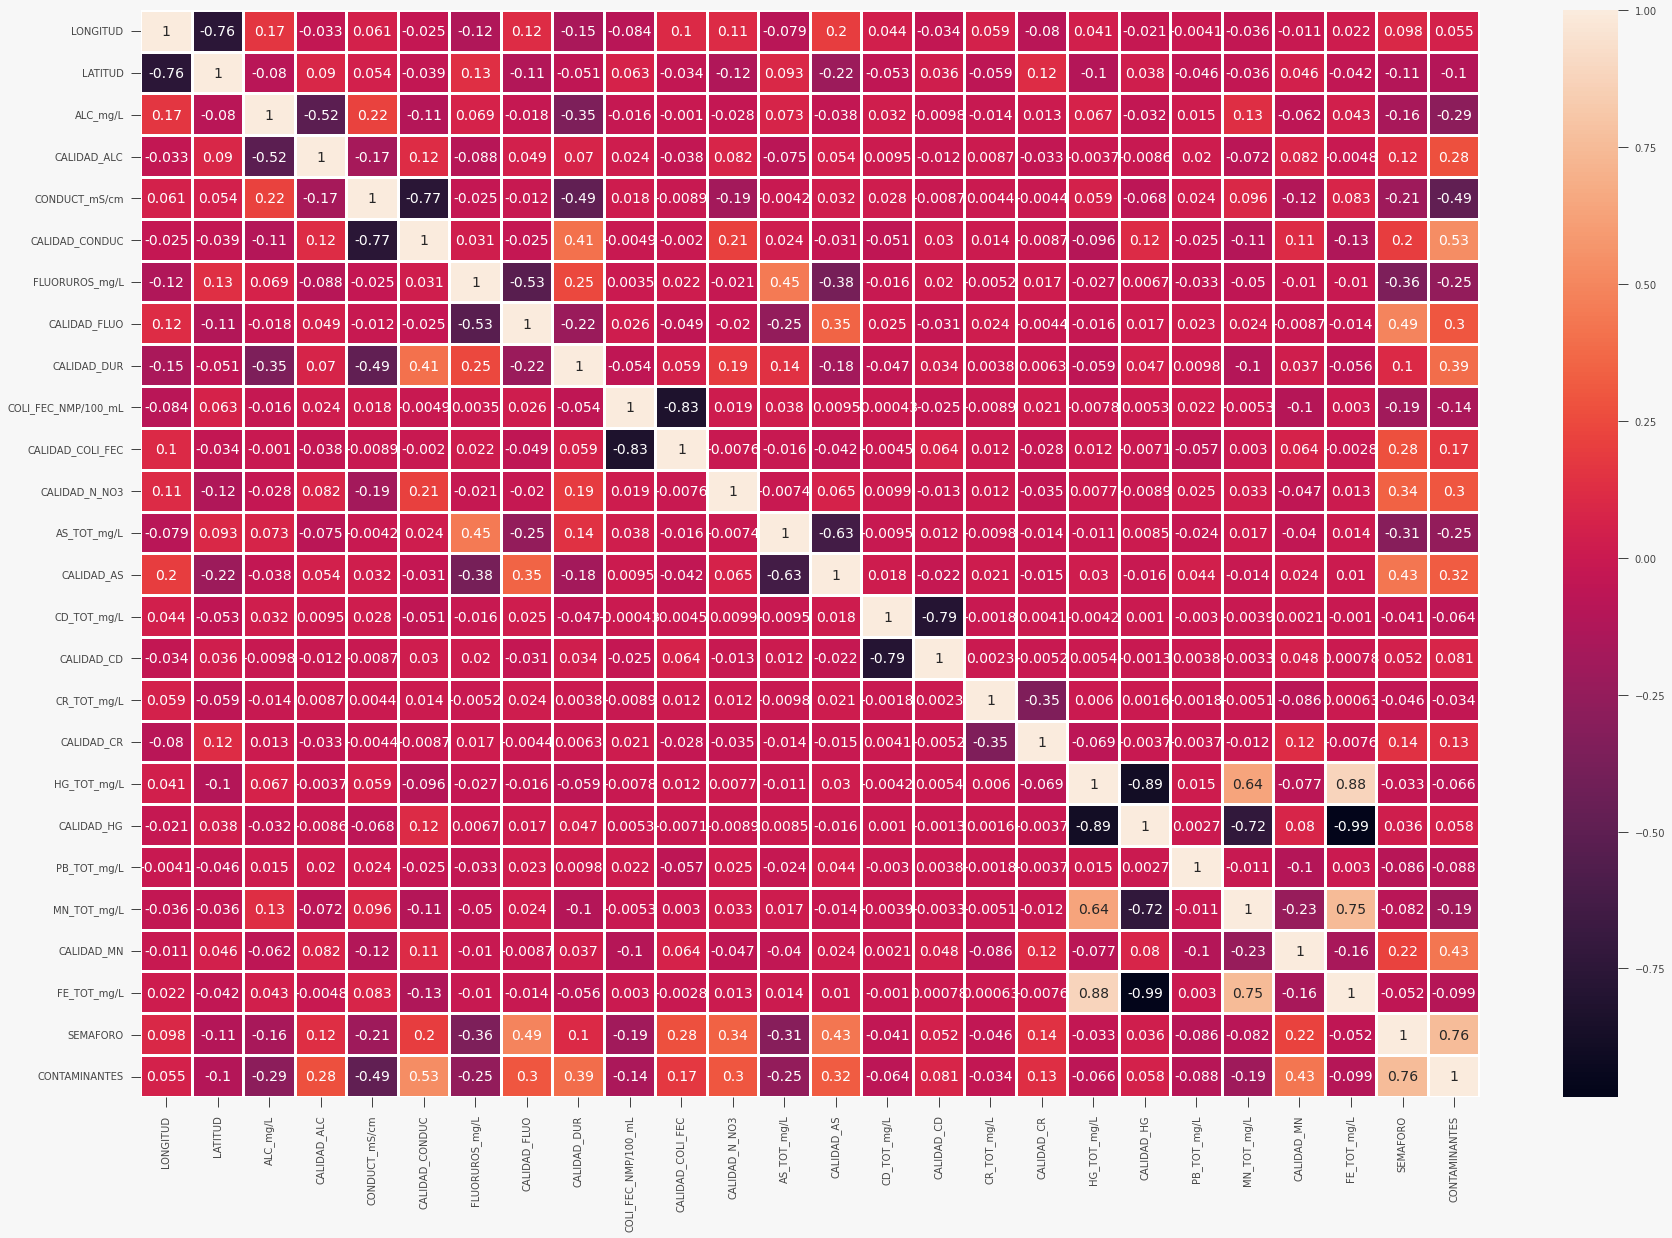

In [245]:
# Revisamos datos en el plot
plt.figure(figsize=(30,20)) 
sns.heatmap(plot_Subterranea_Optimized.corr(), annot=True, linewidths = 2)
plt.show()

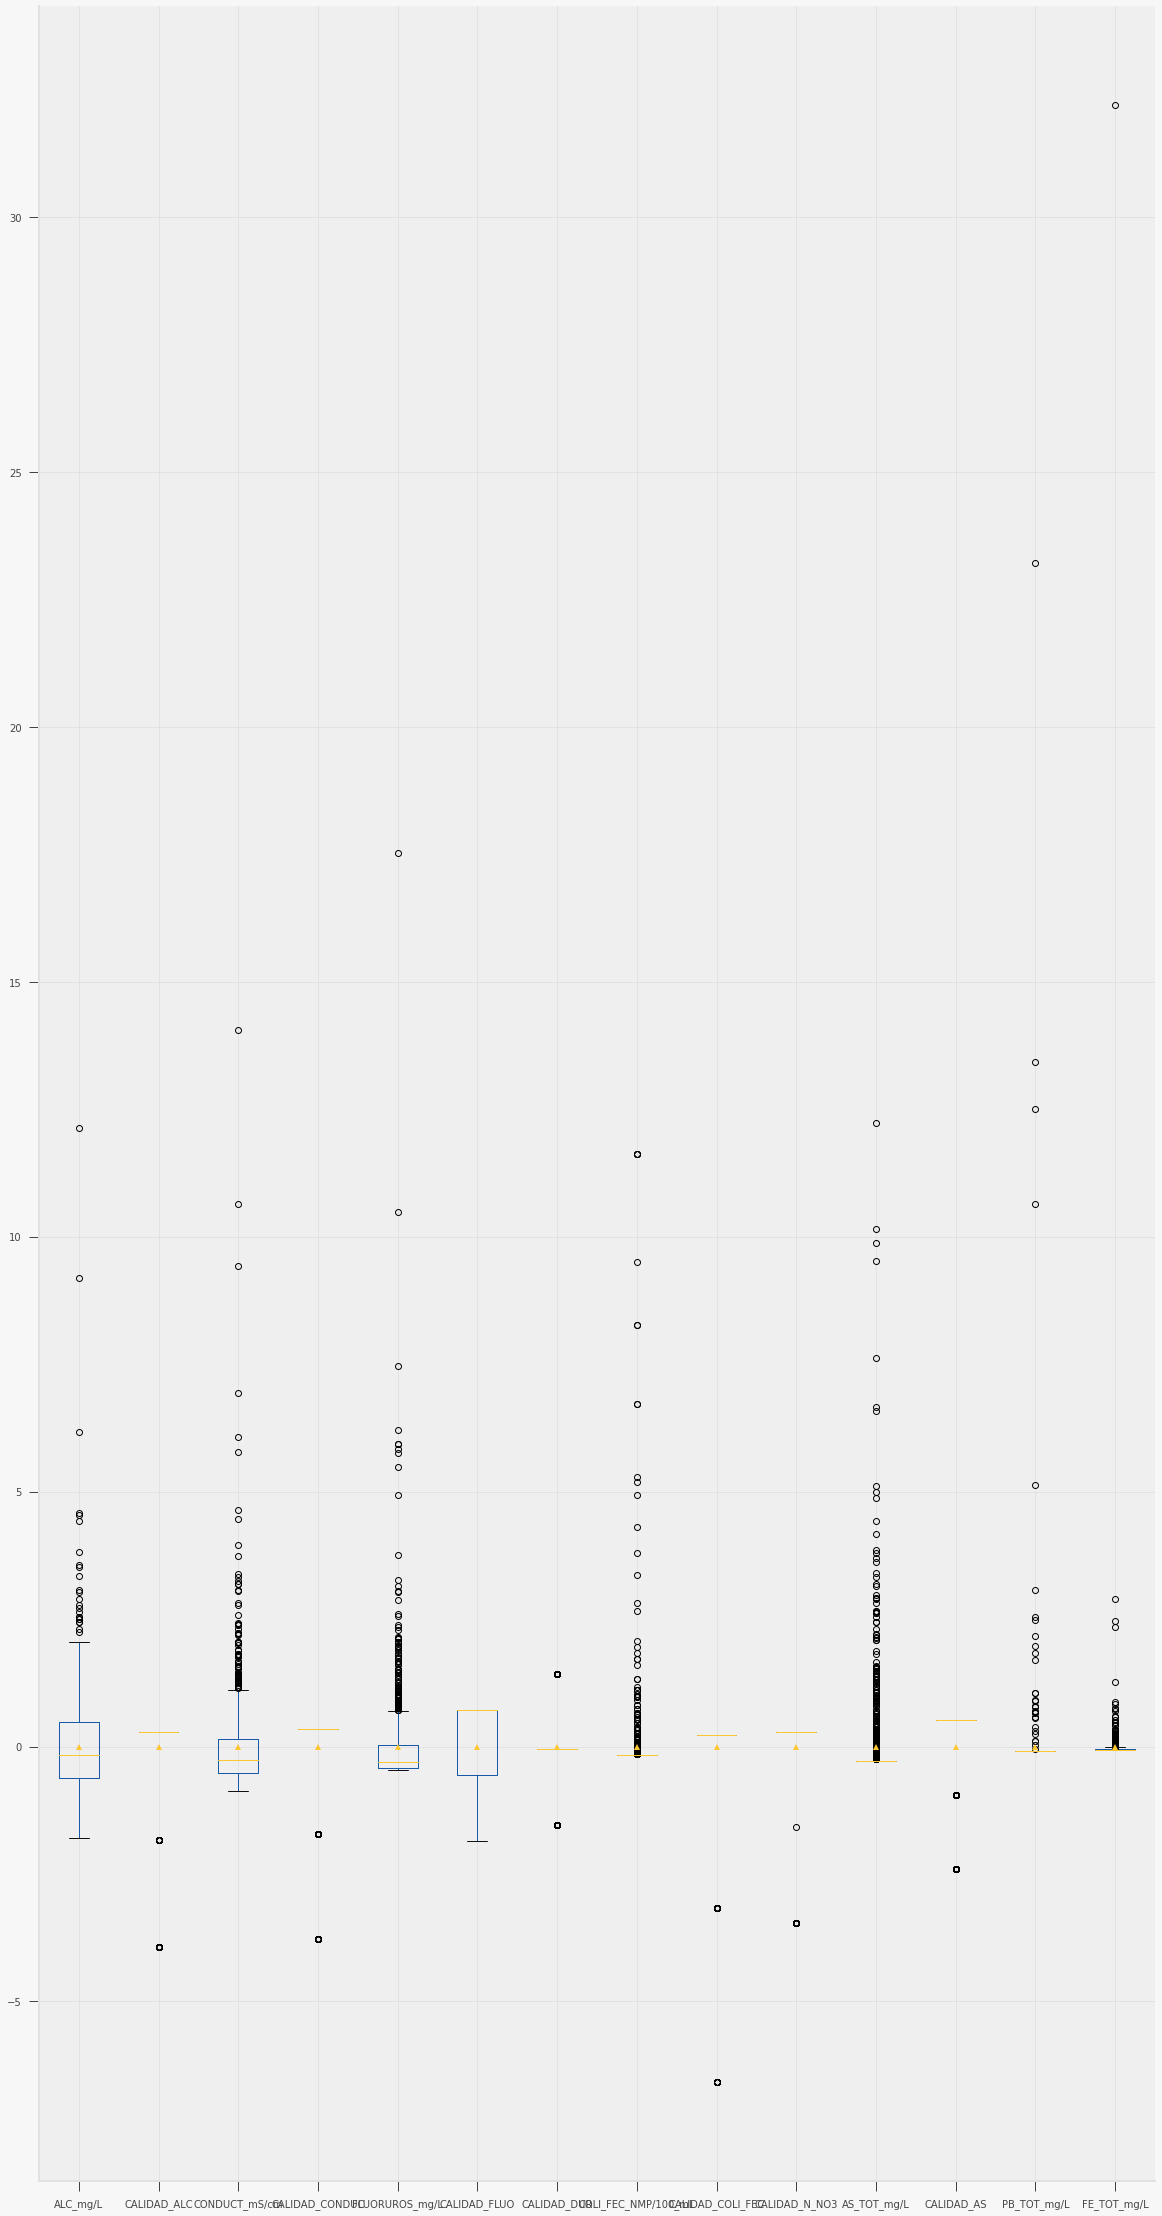

In [246]:
# Revisamos Boxplot
boxplot_Subterranea_Optimized_uno.boxplot(figsize=(20,40),showmeans=True)

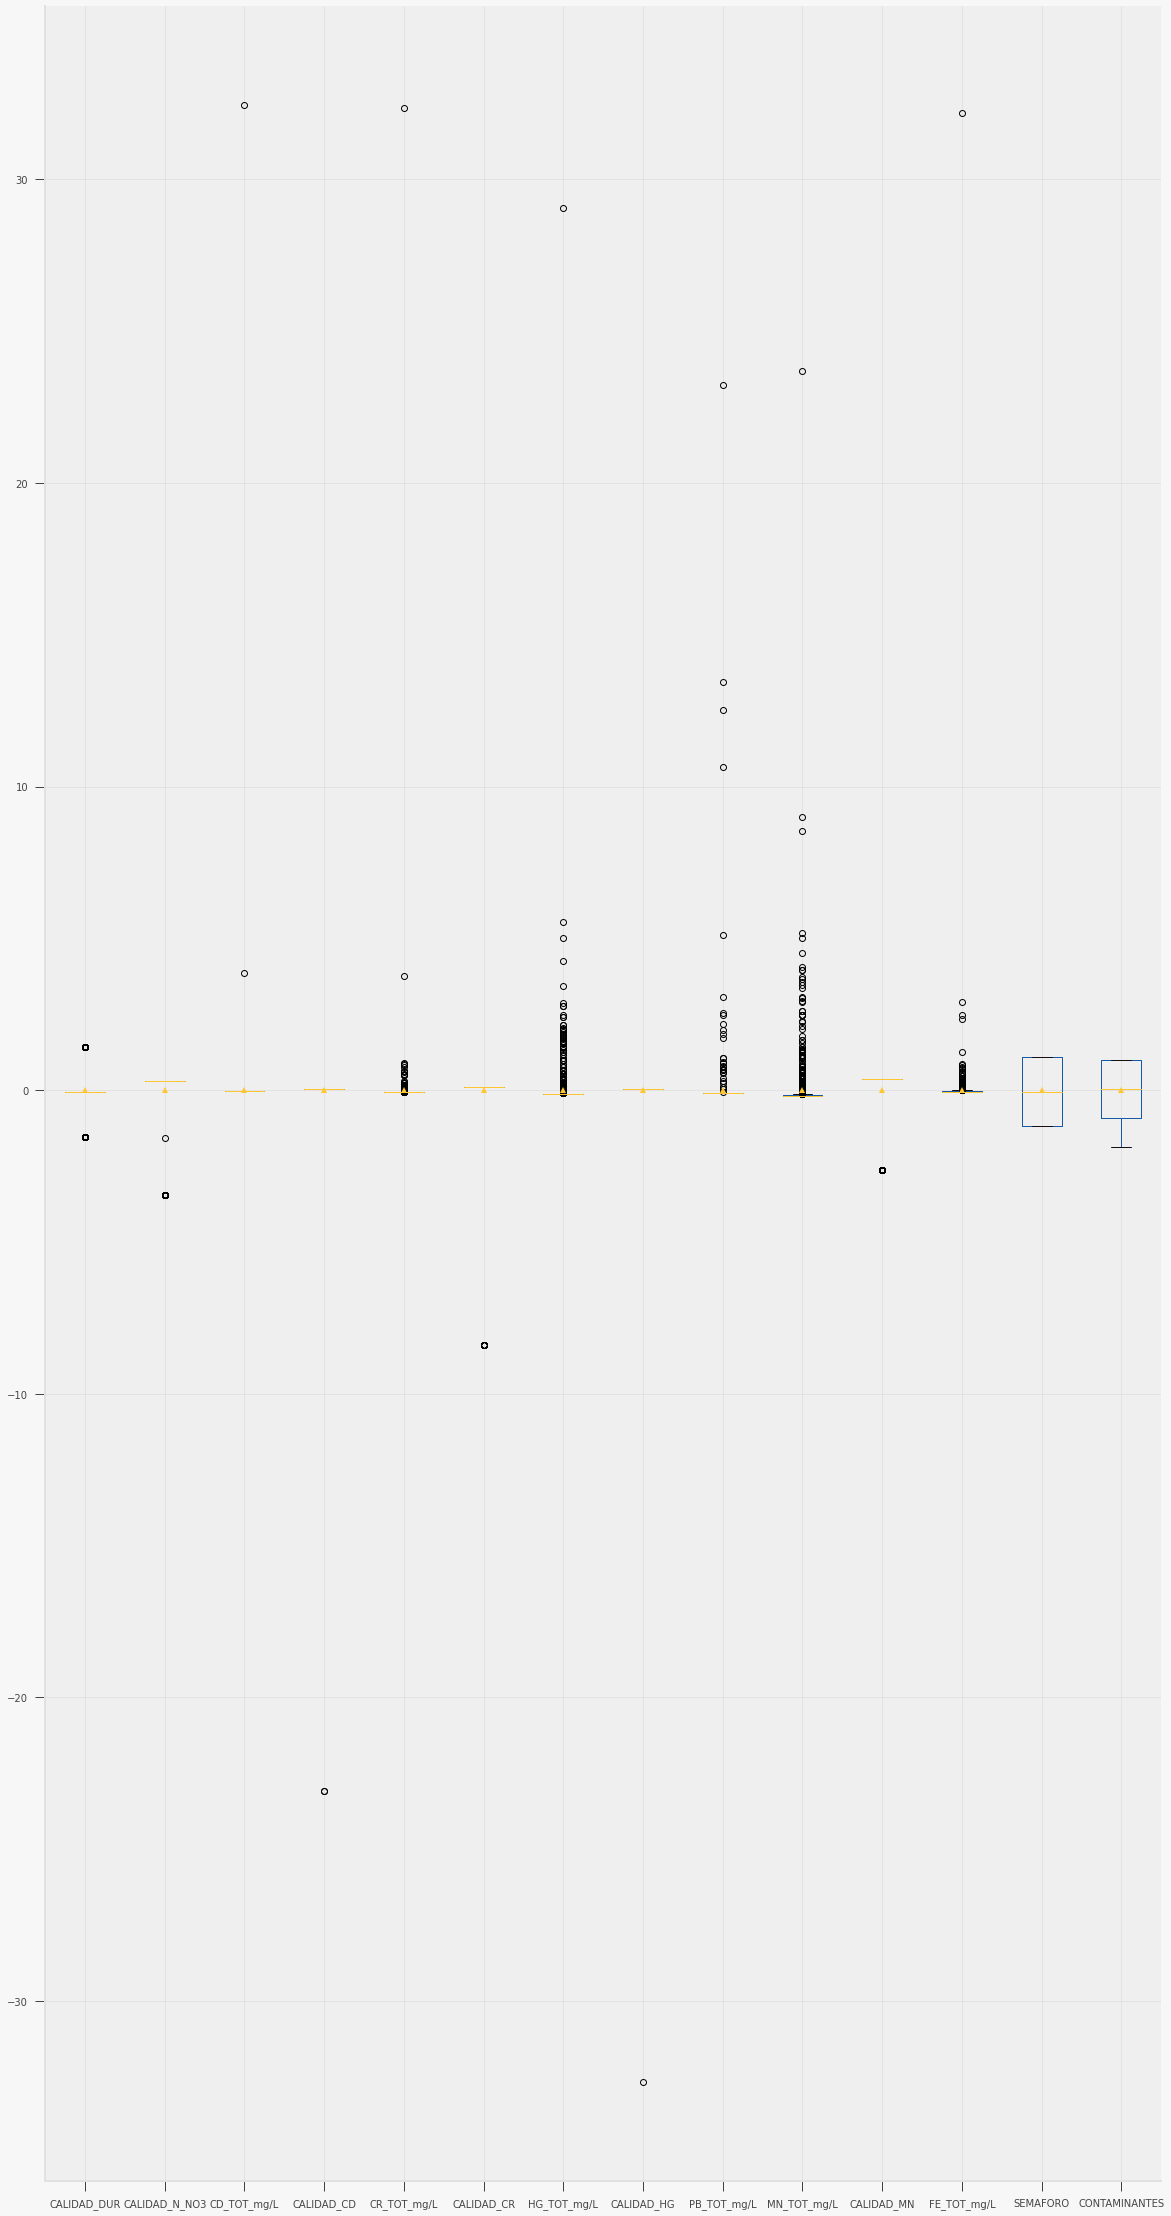

In [247]:
# Revisamos Boxplot
boxplot_Subterranea_Optimized_dos.boxplot(figsize=(20,40),showmeans=True)

#4.- K-Means

In [248]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importa la base de datos

In [249]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Exploremos los datos.

In [250]:

df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [252]:
latlong=df[["LATITUD","LONGITUD"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

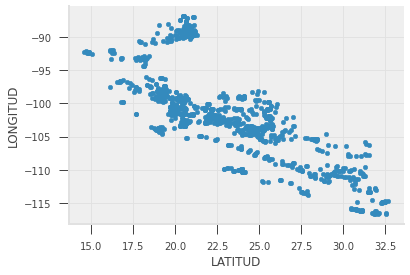

In [253]:
#extrae los datos interesantes
latlong.plot.scatter( "LATITUD","LONGITUD")

In [254]:
latlong.describe()

,LATITUD,LONGITUD
count,1068.000000,1068.000000
mean,23.163618,-101.891007
std,3.887670,6.703263
min,14.561150,-116.664250
25%,20.212055,-105.388865
50%,22.617190,-102.174180
75%,25.510285,-98.974716
max,32.677713,-86.864120


In [255]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [256]:
df['CORDENADAS'] = gpd.points_from_xy(df.LONGITUD, df.LATITUD)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CLAVE                 1068 non-null   object  
 1   SITIO                 1068 non-null   object  
 2   ORGANISMO_DE_CUENCA   1068 non-null   object  
 3   ESTADO                1068 non-null   object  
 4   MUNICIPIO             1068 non-null   object  
 5   ACUIFERO              1068 non-null   object  
 6   SUBTIPO               1068 non-null   object  
 7   LONGITUD              1068 non-null   float64 
 8   LATITUD               1068 non-null   float64 
 9   PERIODO               1068 non-null   int64   
 10  ALC_mg/L              1064 non-null   float64 
 11  CALIDAD_ALC           1064 non-null   object  
 12  CONDUCT_mS/cm         1062 non-null   float64 
 13  CALIDAD_CONDUC        1062 non-null   object  
 14  SDT_mg/L              0 non-null      float64 
 15  SDT_

In [258]:
gdf = gpd.GeoDataFrame(df, geometry="CORDENADAS")

In [259]:
semaforo = df['SEMAFORO'].copy()
gdf['SEMAFORO'] = semaforo

In [260]:
#mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [261]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

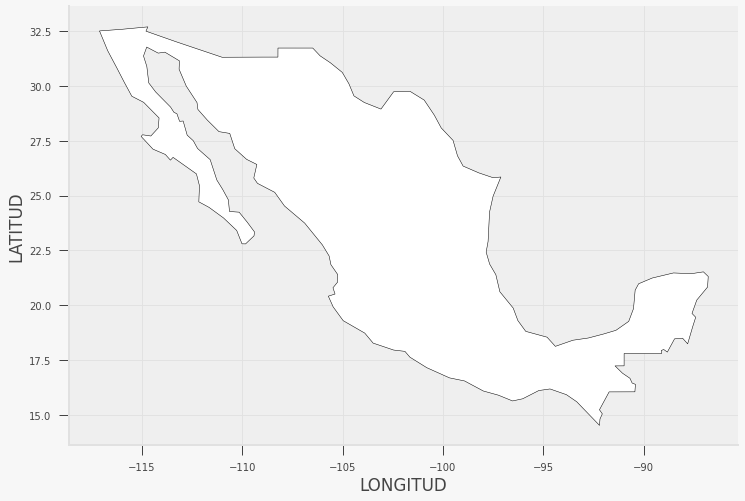

In [262]:
fig, gax = plt.subplots(figsize=(12,12))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

In [263]:
# Mostramos la tabla con los valores de el semaforo verde
Luz_verde= df.loc[:, 'SEMAFORO'] == 'Verde'
Semaforo_verde= df.loc[Luz_verde]
Luz_verde_gdf= gpd.GeoDataFrame(Semaforo_verde, geometry="CORDENADAS")
Luz_verde_gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,CORDENADAS
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.294490,22.184350,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
6,DLBAJ110,"POZO 26, SAN JUAN",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.213960,23.474600,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-110.21396 23.47460)
8,DLBAJ117,LAS PARRITAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,EL CARRIZAL,POZO,-110.088778,23.799861,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-110.08878 23.79986)


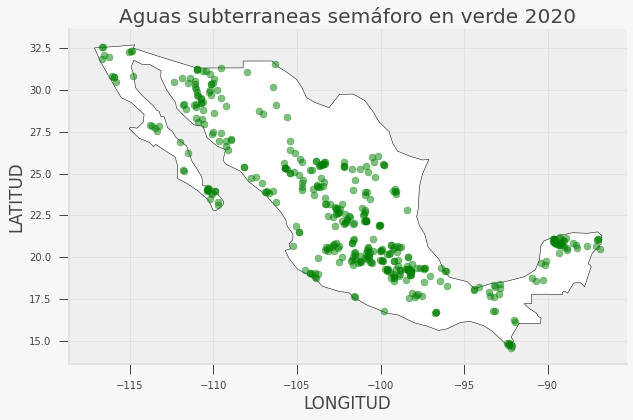

In [264]:
# Mostramos el mapa con los valores de el semaforo verde
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
Luz_verde_gdf.plot(ax=gax, color='green', alpha = 0.5)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterraneas semáforo en verde 2020')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

In [265]:
# Mostramos la tabla con los valores de el semaforo amarillo
Luz_amarillo= df.loc[:, 'SEMAFORO'] == 'Amarillo'
Semaforo_amarillo= df.loc[Luz_amarillo]
Luz_amarillo_gdf= gpd.GeoDataFrame(Semaforo_amarillo, geometry="CORDENADAS")
Luz_amarillo_gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,CORDENADAS
17,DLBAJ131,"L. 20, EJ. STO. DOMINGO",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,SANTO DOMINGO,POZO,-111.922210,25.50470,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-111.92221 25.50470)
21,DLBAJ150,POZO 2A,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LORETO,SAN JUAN B. LONDO,POZO,-111.548940,26.30176,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-111.54894 26.30176)
24,DLBAJ161,CNA-SI-03 (EJ. ALFREDO V. BONFIL),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,MULEGE,SAN IGNACIO,POZO,-112.762754,27.33590,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,NO,POINT (-112.76275 27.33590)
37,DLBAJ70,POZO NO. XII (ANTES A.P. XII),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,POZO,-110.307730,24.08008,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,NO,POINT (-110.30773 24.08008)
38,DLBAJ71,A.P. NO. X,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,POZO,-110.315380,24.05496,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-110.31538 24.05496)


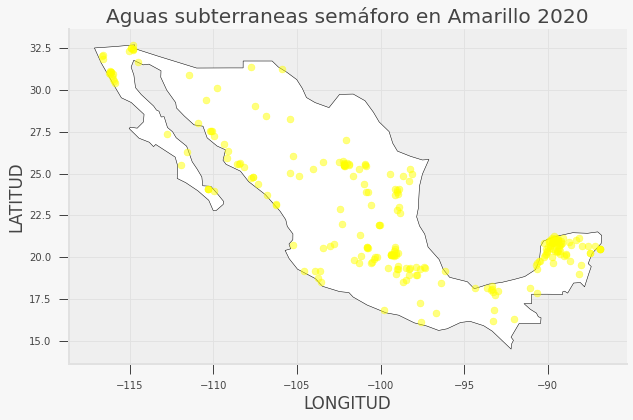

In [266]:
# Mostramos el mapa con los valores de el semaforo amarillo
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
Luz_amarillo_gdf.plot(ax=gax, color='yellow', alpha = 0.5)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterraneas semáforo en Amarillo 2020')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

In [267]:
# Mostramos la tabla con los valores de el semaforo rojo
Luz_roja= df.loc[:, 'SEMAFORO'] == 'Rojo'
Semaforo_rojo= df.loc[Luz_roja]
Luz_rojo_gdf= gpd.GeoDataFrame(Semaforo_rojo, geometry="CORDENADAS")
Luz_rojo_gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,CORDENADAS
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)
5,DLBAJ108,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-110.22067 23.46493)
7,DLBAJ111,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-109.90731 22.89050)
9,DLBAJ118,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,2020,...,NO,SI,NO,SI,SI,SI,SI,NO,NO,POINT (-110.05472 23.82472)


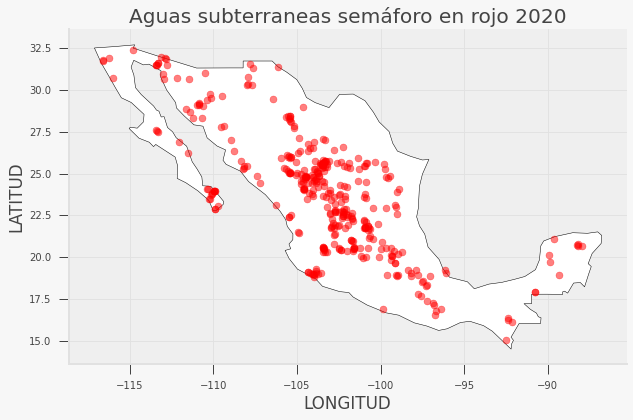

In [268]:
# Mostramos el mapa con los valores de el semaforo rojo
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
Luz_rojo_gdf.plot(ax=gax, color='red', alpha = 0.5)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterraneas semáforo en rojo 2020')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

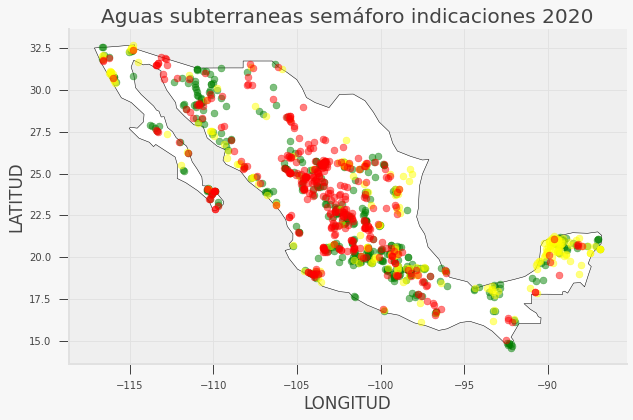

In [269]:
# Mostramos el mapa con los tres colores de el semaforo
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
Luz_verde_gdf.plot(ax=gax, color='green', alpha = 0.5)
Luz_amarillo_gdf.plot(ax=gax, color='yellow', alpha = 0.5)
Luz_rojo_gdf.plot(ax=gax, color='red', alpha = 0.5)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterraneas semáforo indicaciones 2020')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

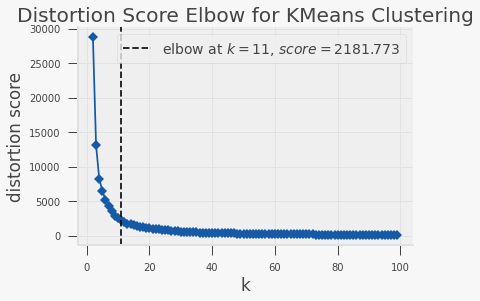

In [270]:
# Clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans( n_init=100)
visualizer = KElbowVisualizer(kmeans, k=(2,100),metric='distortion',timings=False,)
visualizer.fit(gdf[['LATITUD','LONGITUD']])  
visualizer.show() 



In [271]:

kmeans = KMeans(n_clusters=11).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)


[[  20.54689724  -89.18837385]
 [  24.95775443 -104.29863484]
 [  19.11885845  -98.42420059]
 [  29.20352126 -110.99292008]
 [  21.49394246 -101.45083268]
 [  31.61429212 -115.25191318]
 [  17.00409656  -92.76162732]
 [  24.72832071 -100.69795084]
 [  19.9200711  -103.49081911]
 [  29.42764932 -106.39595561]
 [  24.78380216 -109.40506024]]


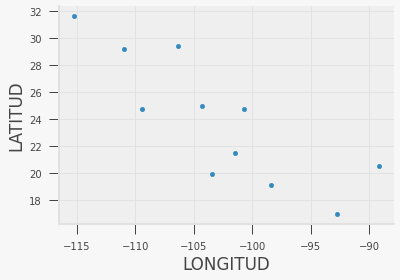

In [272]:
Latitud_KMEAN=centroids[:,0]
Longitud_KMEAN=centroids[:,1]
Cordenadas_KMEAN={'LATITUD':Latitud_KMEAN,'LONGITUD':Longitud_KMEAN}
Cordenadas_KMEAN=pd.DataFrame(Cordenadas_KMEAN)
Cordenadas_KMEAN.plot.scatter( "LONGITUD","LATITUD")


In [273]:
dfK=pd.DataFrame()
dfK["Cordenadas"] = list(zip(Cordenadas_KMEAN.LONGITUD, Cordenadas_KMEAN.LATITUD))
dfK["Cordenadas"] = dfK["Cordenadas"].apply(Point)
dfK.head()
Plot_azul_gdf= gpd.GeoDataFrame(dfK, geometry="Cordenadas")

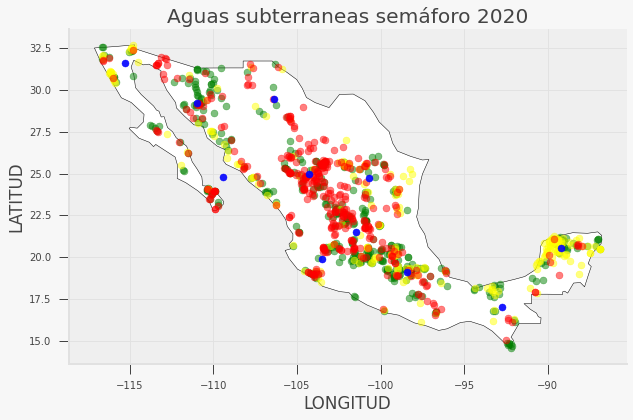

In [274]:
# Mostramos el mapa con los tres colores de el semaforo

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
Luz_verde_gdf.plot(ax=gax, color='green', alpha = 0.5)
Luz_amarillo_gdf.plot(ax=gax, color='yellow', alpha = 0.5)
Luz_rojo_gdf.plot(ax=gax, color='red', alpha = 0.5)
Plot_azul_gdf.plot(ax=gax, color='blue', alpha = 0.90)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas subterraneas semáforo 2020')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

Fin.